In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon
from IPython.display import HTML
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score
mp.rcParams['animation.embed_limit'] = 2**128

In [3]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [4]:
'''Update the datetime columns from string to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [18]:
loan_data.sort_values(by=['issue_d'], ascending=True)
loan_data.reset_index(drop=True)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,inq_fi,inq_last_12m,mort_acc,hardship_flag,disbursement_method,age_of_credit_in_days,Risk
0,30000,36 months,22.35,1151.16,D,D5,5 years,MORTGAGE,100000.0,Source Verified,...,0.0,472330.0,42200.0,1.0,3.0,1.0,N,Cash,2526,No Risk
1,40000,60 months,16.14,975.71,C,C4,< 1 year,MORTGAGE,45000.0,Verified,...,0.0,271068.0,54200.0,4.0,4.0,1.0,N,Cash,3470,No Risk
2,20000,36 months,7.56,622.68,A,A3,10+ years,MORTGAGE,100000.0,Not Verified,...,0.0,515779.0,85100.0,2.0,0.0,5.0,N,Cash,7243,No Risk
3,4500,36 months,11.31,147.99,B,B3,10+ years,RENT,38500.0,Not Verified,...,306.0,29137.0,29200.0,0.0,3.0,0.0,N,Cash,5479,No Risk
4,8425,36 months,27.27,345.18,E,E5,3 years,MORTGAGE,450000.0,Verified,...,0.0,690320.0,56000.0,7.0,5.0,4.0,N,Cash,7731,No Risk
5,20000,60 months,17.97,507.55,D,D1,4 years,RENT,57000.0,Not Verified,...,0.0,33356.0,72700.0,0.0,0.0,1.0,N,Cash,8645,No Risk
6,6600,36 months,11.31,217.05,B,B3,10+ years,RENT,45000.0,Not Verified,...,0.0,26836.0,10600.0,0.0,0.0,0.0,N,Cash,3531,No Risk
7,2500,36 months,13.56,84.92,C,C1,5 years,RENT,42000.0,Not Verified,...,0.0,18649.0,10500.0,2.0,1.0,0.0,N,Cash,5388,No Risk
8,4000,36 months,17.97,144.55,D,D1,5 years,MORTGAGE,60000.0,Source Verified,...,0.0,106556.0,5200.0,3.0,3.0,2.0,N,Cash,4201,No Risk
9,2700,36 months,8.19,84.85,A,A4,4 years,OWN,24000.0,Not Verified,...,449.0,75363.0,7400.0,1.0,0.0,0.0,N,Cash,5905,No Risk


In [22]:
loan_data['issue_d'].tail(5)


1338219   2017-10-01
1338220   2017-10-01
1338221   2017-10-01
1338222   2017-10-01
1338223   2017-10-01
Name: issue_d, dtype: datetime64[ns]

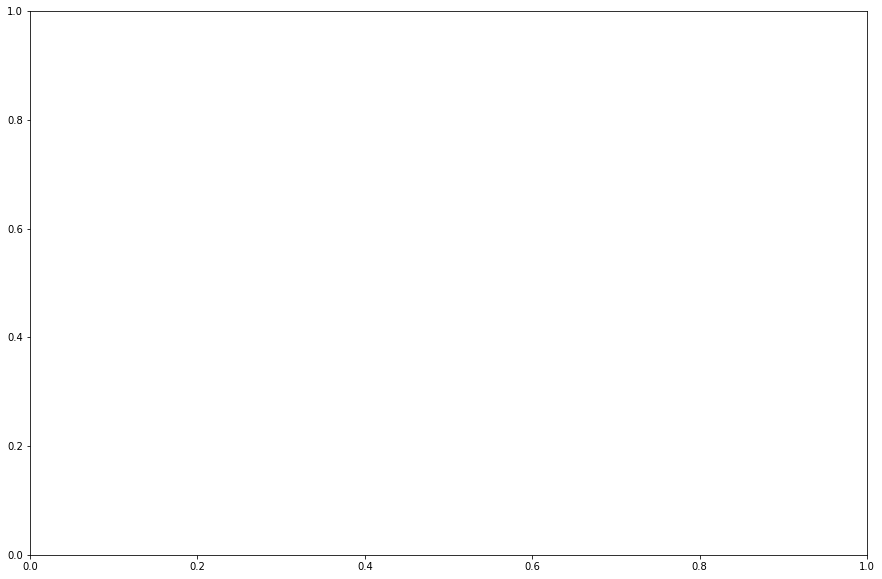

In [8]:
figure, ax = plt.subplots(figsize = (15, 10))

def plot_per_year(year):
    ax.clear()
    points = df2.iloc[:current_frame]
    loan_data_sub = loan_data[loan_data['issue_d'].dt.year <= year]
    sns.scatterplot(x="annual_inc", y="int_rate", hue='loan_status', data=loan_data_sub, alpha=0.75, 
                    s=200, legend=None)
    plt.xlabel('Annual Income in dollars', alpha = 0.75)
    plt.ylabel('Interest Rate (%)', alpha = 0.75)
    ax.text(5, 5, year, size = 30)

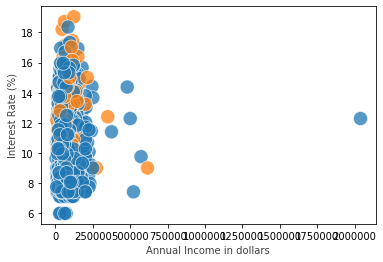

In [12]:
plot_per_year(2008)

In [ ]:
animator = animation.FuncAnimation(
    figure, plot_per_year, frames = range(2007, 2008), interval = 100, repeat = True)
#animator.save('animation.gif')
HTML(animator.to_jshtml())